## K-Means Kümeleme Algoritması Nedir?
K-means algoritması, bir veri kümesini k sayıda kümeye ayırmak için kullanılan bir denetimsiz öğrenme algoritmasıdır. Bu algoritma, veri noktalarını benzerliklerine göre kümelemeyi amaçlar. 

K-means algoritmasında her küme, o kümenin merkez noktası (centroid) olarak adlandırılan bir temsil noktası etrafında toplanır. Algoritma, her veri noktasını en yakın olduğu küme merkezine atayarak kümeleri oluşturur ve bu süreç, belirli bir durma kriteri sağlanana kadar tekrar eder.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/k_means/kmeans.png?raw=true" width="500"/>


#### K-means Algoritması Adımları

- Küme Sayısının Belirlenmesi:

Algoritmanın ilk adımı, kaç tane küme oluşturulacağını belirlemektir. Bu sayı k olarak adlandırılır ve kullanıcı tarafından belirlenir. 
Örneğin, verileri 3 farklı kümeye ayırmak istiyorsak, k=3 olarak seçilir.

- Başlangıç Küme Merkezlerinin Seçilmesi:

k tane başlangıç küme merkezi rastgele seçilir. Bu merkezler, veri kümesinin içerisindeki herhangi bir veri noktası olabilir.

- Veri Noktalarının Küme Ataması:

Her bir veri noktası, en yakın olduğu küme merkezine atanır. Bu yakınlık, genellikle Öklidyen mesafesi kullanılarak hesaplanır. Her veri noktası, mesafe ölçümüne göre en yakın olduğu kümenin bir üyesi olur.

- Küme Merkezlerinin Güncellenmesi:

Her bir küme için, o kümede bulunan tüm veri noktalarının ortalaması alınarak yeni küme merkezi hesaplanır. Bu, kümedeki tüm veri noktalarının koordinatlarının aritmetik ortalaması alınarak yapılır.

- Tekrarlama:

3. ve 4. adımlar, küme merkezlerinin yerleri değişene kadar veya belirli bir iterasyon sayısına ulaşılana kadar tekrar edilir. Küme merkezleri sabit kaldığında, algoritma durur ve son küme merkezleri ile veri noktalarının atamaları elde edilir.

##### K-means Algoritmasının Avantajları
- Basitlik ve Hız: K-means, anlaşılması ve uygulanması kolay bir algoritmadır. Büyük veri setlerinde bile hızlı çalışır.

- Veri İçin Öngörüsüz: Algoritma, veri kümesinin özelliklerine bağlı olmadan genel bir şekilde uygulanabilir.

##### K-means Algoritmasının Dezavantajları

- Küme Sayısının Belirlenmesi: 
k değerinin başlangıçta belirlenmesi gereklidir ve bu değer genellikle deneme-yanılma yöntemi ile bulunur.

- Başlangıç Merkezlerine Bağımlılık: Algoritmanın sonucu, başlangıçta seçilen küme merkezlerine bağlıdır. Farklı başlangıç noktaları, farklı sonuçlar verebilir. Bu nedenle, algoritmanın birden çok kez çalıştırılması önerilir.

- Küresel Kümeler: K-means, küresel ve benzer boyuttaki kümeleri daha iyi ayırır. Küresel olmayan veya farklı yoğunluklardaki kümelerde performansı düşebilir.

- Hassasiyet: Uç değerlere ve gürültüye karşı hassastır.

##### K-Means Uygulama Alanları

- Müşteri Segmentasyonu: Müşteri verilerini benzer davranışlar veya özellikler temelinde gruplamak.
- Görüntü Sıkıştırma: Renkli görüntülerde renk sayısını azaltarak sıkıştırma sağlamak.
- Belge Kümeleme: Benzer içeriklere sahip belgeleri gruplamak.
- Dolandırıcılık Tespiti: Sahte iddialarla ilgili geçmiş verileri kullanarak, yeni iddiaları , sahte kalıpları belirten kümelere yakınlığına dayanarak kümelemek.

### K-Means Örnek Uygulama

Bu uygulamada müşteri bilgileri ve satın alma verilerinin olduğu bir veri seti ile kişiye göre harcama skorları hesaplanıyor.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/azsaritas/makine_ogrenmesi/main/dosyalar/k_means/Mall_Customers.csv')


#### Gerekli kütüphaneleri ve veri setini import ediyoruz.

In [2]:
dataset.head(10) #ilk 10 veri

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### Veri setindeki öznitelikler Müşteri Numarası, Cinsiyet, Yaş, Yıllık Gelir ve Harcama Skoru. Harcama Skoru müşterilerin geçmiş alış-veriş kayıtlarına dayanarak market tarafından belirlenmiş bir puandır. Puan 1’e yaklaşması müşterinin daha az harcama yapan bir müşteri olduğunu gösterir. Burada müşterileri kümelere ayırıyoruz.


In [3]:
pd.pivot_table(data = dataset, columns = "Gender", values = ["Annual Income (k$)", "Spending Score (1-100)"], aggfunc = np.mean)

Gender,Female,Male
Annual Income (k$),59.250000,62.227273
Spending Score (1-100),51.526786,48.511364


#### Cinsiyetlere göre gelir ve harcama skoru


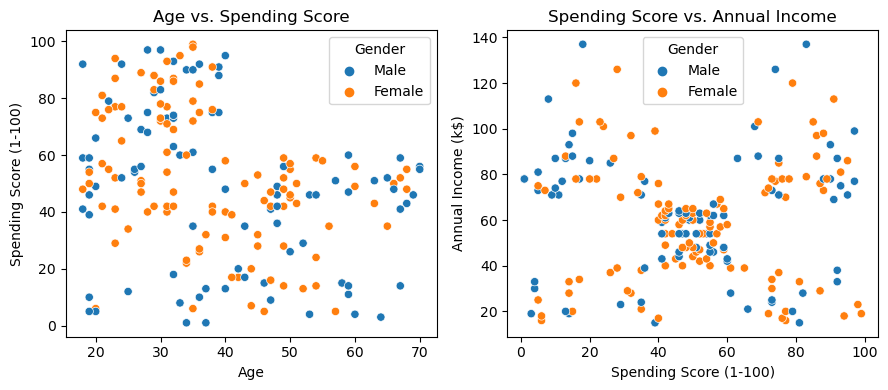

In [4]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# İlk scatter plot
sns.scatterplot(ax=axes[0], x=dataset["Age"], y=dataset["Spending Score (1-100)"], hue=dataset["Gender"])
axes[0].set_title("Age vs. Spending Score")

# İkinci scatter plot
sns.scatterplot(ax=axes[1], x=dataset["Spending Score (1-100)"], y=dataset["Annual Income (k$)"], hue=dataset["Gender"])
axes[1].set_title("Spending Score vs. Annual Income")

plt.tight_layout()

plt.show()

#### Yaş-cinsiyete göre harcama skorunu ve Harcama skoru-cinsiyete göre geliri görselleştiriyoruz.

In [5]:
X = dataset.iloc[:,[3,4]].values

#### Özniteliklerden bağımsız değişken olarak sadece yıllık geliri ve harcama skorunu kullanıyoruz.

In [6]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Kmeans sınıfından kmeans adında bir nesne oluşturuyoruz. Nesne oluştururken yapıcı fonksiyona parametreler gönderiyoruz. Bunlardan ilki küme sayısı  olan n_clusters. for döngüsü i değişkeniyle her dönüşünde bir artarak küme sayısını parametre olarak n_clusters’a veriyor. init parametresi ise başlangıç noktalarını seçmek için ideal küme merkezlerini belirliyor. Bir sonraki parametre max_iter algoritmanın nihai durumuna erişmesi için en fazla kaç iterasyon yapabileceğini belirler, varsayılan 300’tür. n_init ise küme merkezi başlangıç noktasının kaç farklı noktadan başlayabileceğini belirler. Son parametre random_state, bu işlemleri uygulayan herkesin aynı sonuçları elde etmesini sağlar. Nesne oluştuktan sonra fit() metodu ile nesne ile veri uyumunu gerçekleştiririz. Parametre olarak daha önce oluşturduğumuz X’i veriyoruz. for döngüsünden önce oluşturduğumuz wcss listesine kmeans nesnesinin inerita_ özelliğini ekliyoruz.


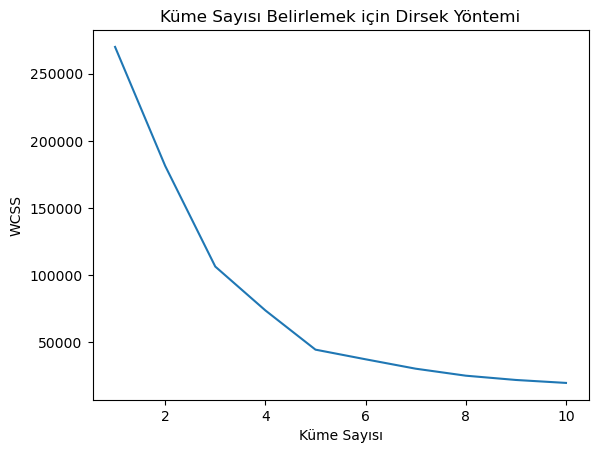

In [7]:
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()


#### İdeal küme sayısını bulmak için Dirsek (Elbow) methodu kullanıyoruz. Dirsek metodu; noktaların her K değerine göre küme merkezine uzaklıklarının karesi toplamı hesaplanmaktadır. Bu değerlere göre her K değeri için grafik çizilmektedir. Grafik üzerinde toplamlar arasındaki farkın azalmaya başladığı dirsek noktası en uygun K değeri olarak belirlenmektedir.
#### Grafikten ideal küme sayısının 5 olacağını görebiliyoruz.


In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#### Küme sayısına göre kümeleme yapıyoruz ve kümelemeyi görselleştiriyoruz.

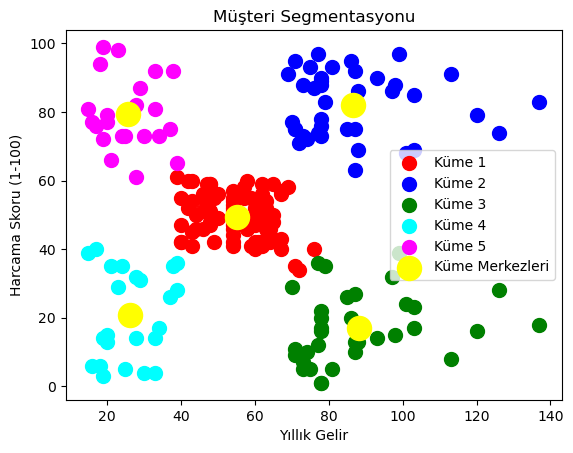

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Küme 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Küme 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Küme 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Küme 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Küme 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Küme Merkezleri')
plt.title('Müşteri Segmentasyonu')
plt.xlabel('Yıllık Gelir')
plt.ylabel('Harcama Skoru (1-100)')
plt.legend()
plt.show()

#### Grafikte bu veri setinden oluşuturduğumuz kümeler ve küme merkezleri görülmektedir.